In [2]:
import sys
sys.path.insert(0, '/Users/abertran/Documents/gitRepositories/Steve_notebooks/SteveBobNotebooks/lib')
from capacityHelpers import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)

Populating the interactive namespace from numpy and matplotlib


Read in Steve's csv

In [3]:
file_name='na6-cpu-capacity.csv'
dir_name='/Users/abertran/Documents/gitRepositories/Steve_notebooks/SteveBobNotebooks/data/'
data = importArgusTimeSeriesCSV(dir_name+file_name)
data.tail()

,"db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}"
Timestamp,,,,,,,,,,,,,,,,
2017-12-13,6.23368,49.948640,39.039679,55.050799,58.760081,43.582960,59.236599,79.408960,6.47459,4.81480,4.80040,19.819931,5.83576,4.66964,4.61368,3.98104
2017-12-14,4.59664,41.534440,38.320119,52.962461,62.789879,38.235199,55.628080,81.193398,6.66397,4.78544,4.57188,20.301679,5.42100,4.66720,4.52868,4.16188
2017-12-15,6.04454,56.803101,37.075720,46.001551,45.747379,34.386791,50.574538,65.563810,6.58724,4.99576,4.60748,23.444800,5.69728,4.81232,4.98856,4.09007
2017-12-16,4.23603,29.339660,12.376320,34.511711,32.081509,24.859240,31.549680,42.670730,5.88516,4.80204,4.42905,19.984540,5.90726,4.63852,5.04036,4.01227
2017-12-17,5.77920,25.925090,9.706900,31.760620,31.627200,25.344299,19.220400,35.089500,5.98059,4.57190,4.20120,18.355651,5.85754,4.57570,4.94150,4.32200


Read in data pulled from Argus using following query:
DOWNSAMPLE(-40d:db.*.SP*.na6:CPUUtil{source=OEM,device=db1-*}:avg:1m-avg,#1d-p99#)

In [4]:
file_name='data.csv'
dir_name='/Users/abertran/Documents/Data/CPUUtilRegModel/'
dataArgus = importArgusTimeSeriesCSV(dir_name+file_name)
dataArgus.tail(12)
dataArgus.head()

,"db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}"
Timestamp,,,,,,,,,,,,,,,,
2017-10-15,3.93520,21.241831,9.529230,32.018710,31.110530,17.716199,14.867670,32.049421,3.87218,5.01165,3.40652,8.03290,16.742550,5.27246,4.54202,3.57750
2017-10-16,4.14557,38.327031,33.724320,55.171100,46.053920,48.350740,48.995490,66.634799,4.72421,4.96698,3.46713,8.16231,18.243040,5.13320,4.95018,3.63828
2017-10-17,4.22420,38.842121,34.043799,53.017660,51.442839,41.572119,48.964179,67.107578,4.66018,4.98983,3.62161,8.08480,16.048690,5.03580,5.20757,3.65351
2017-10-18,4.14508,33.961990,32.670169,52.777689,47.057489,56.765731,44.584820,82.036130,4.49739,5.37990,3.78441,8.09680,24.084680,5.05746,5.17461,3.69530
2017-10-19,4.02976,40.055461,33.347320,48.396370,45.842211,59.823559,46.429201,64.019240,4.56746,5.04311,3.77254,8.08726,18.496599,4.99996,4.86594,3.77206


Plot the most recent data

In [5]:
type(data.index.values[1])
data.index.values[1] > np.datetime64('2017-11-01')
#np.datetime64('2017-11-1')
data.index.values[1]

numpy.datetime64('2016-11-13T00:00:00.000000000')

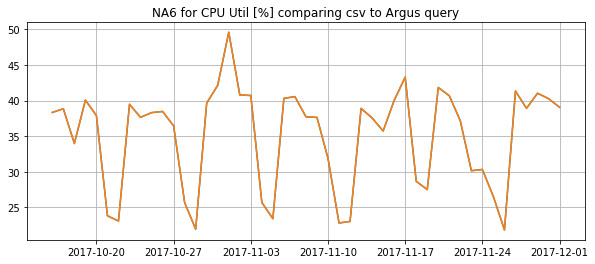

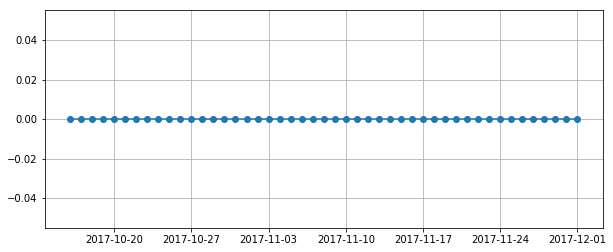

In [6]:
mask=(data.index.values > np.datetime64('2017-10-15')) & (data.index.values <= np.datetime64('2017-12-01'))
data_z=data.loc[mask]
mask=(dataArgus.index.values > np.datetime64('2017-10-15')) & (dataArgus.index.values <= np.datetime64('2017-12-01'))
dataArgus_z=dataArgus.loc[mask]
plt.plot(data_z.index.values,data_z['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}'])
plt.plot(dataArgus_z.index.values,dataArgus_z['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}'])
plt.title('NA6 for CPU Util [%] comparing csv to Argus query')
plt.grid(True)
plt.show()

diff=data_z['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}']-dataArgus_z['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}']
plt.plot(data_z.index.values,diff, marker='o')
plt.grid(True)
plt.show()

Most points are the same except a few points in November that are duplicated in the csv files and one of the values matches and the other does not. Note that the last data point does not match - probably because at the time of collection the full day's worth of data was not available so do not use the last data point out of the csv files.

In [7]:
dataArgus_z = dataArgus_z[~dataArgus_z.index.duplicated(keep='last')]

,"db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}"
Timestamp,,,,,,,,,,,,,,,,
2017-10-16,4.14557,38.327031,33.724320,55.171100,46.053920,48.350740,48.995490,66.634799,4.72421,4.96698,3.46713,8.16231,18.243040,5.13320,4.95018,3.63828
2017-10-17,4.22420,38.842121,34.043799,53.017660,51.442839,41.572119,48.964179,67.107578,4.66018,4.98983,3.62161,8.08480,16.048690,5.03580,5.20757,3.65351
2017-10-18,4.14508,33.961990,32.670169,52.777689,47.057489,56.765731,44.584820,82.036130,4.49739,5.37990,3.78441,8.09680,24.084680,5.05746,5.17461,3.69530
2017-10-19,4.02976,40.055461,33.347320,48.396370,45.842211,59.823559,46.429201,64.019240,4.56746,5.04311,3.77254,8.08726,18.496599,4.99996,4.86594,3.77206
2017-10-20,4.88445,37.881169,31.006800,48.082430,47.705441,43.507141,41.827981,61.273900,3.85695,4.49585,3.63304,7.52877,15.464130,4.31890,4.20285,3.75757


Let's compare against Horizon data

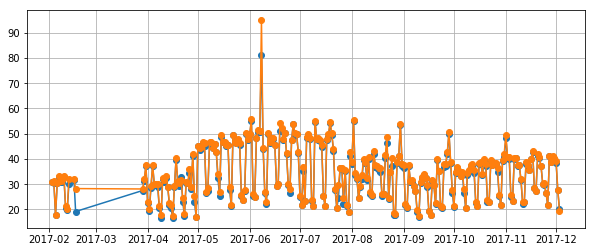

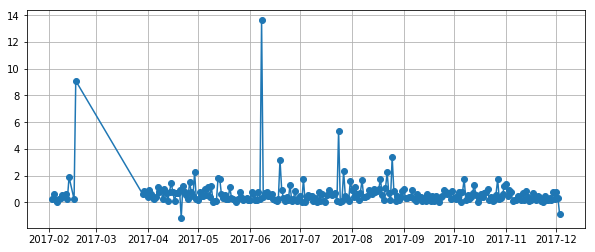

In [8]:
dir_name='/Users/abertran/Documents/Data/CPUUtilRegModel/'
#filename='p99_hue_query_results.csv'
filename='db_cpu_daily.csv'

def importHorizonTimeSeriesCSV(filename):
    ts = pd.read_csv(filename, index_col=0, parse_dates=['date_key'], date_parser=lambda x: pd.datetime.strptime(x, '%Y%m%d'))
    return ts

dataHorizon=importHorizonTimeSeriesCSV(dir_name+filename)
dataHorizon.columns=['pod','date_key','cpu']
dataHorizon.reset_index(level=0, inplace=True)

#Let's pick a host to compare
mask=(dataHorizon['hostname']=='na6-db1-4-chi.ops.sfdc.net')
dataHorizon = dataHorizon.loc[mask]
dataHorizon=dataHorizon.sort_values(['hostname', 'date_key'], ascending=[1, 0])
dataHorizon.head()

data.reset_index(level=0, inplace=True)
data.head()
new_df = pd.merge(data, dataHorizon,  how='inner', left_on=['Timestamp'], right_on = ['date_key'])
new_df['diff']=new_df['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}']-new_df['cpu']


plt.plot(new_df['date_key'],new_df['cpu'], marker='o')
plt.plot(new_df['date_key'],new_df['db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-4}'], marker='o')
plt.grid()
plt.show()



plt.plot(new_df['date_key'],new_df['diff'], marker='o');
plt.grid()
plt.show()
#type(new_df)
#type(data)

In [155]:
new_df.head()

,Timestamp,"db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-2}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-4}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-6}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.WAS.SP4.na6:CPUUtil{source=OEM,device=db1-7}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-2}",...,"db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-3}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-1}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-8}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-5}","db.CHI.SP4.na6:CPUUtil{source=OEM,device=db1-7}",hostname,pod,date_key,cpu,diff
0,2017-02-03,4.39570,3.50178,21.958159,3.51476,3.92208,3.04226,2.79819,3.48210,45.906200,...,36.221821,43.839569,3.53610,27.107801,30.447630,na6-db1-4-chi.ops.sfdc.net,na6,2017-02-03,30.773400,0.223860
1,2017-02-04,4.29235,3.22321,25.609730,3.40234,4.10972,3.00410,2.83725,3.41600,32.104500,...,27.485759,31.591140,3.63125,29.201440,29.793601,na6-db1-4-chi.ops.sfdc.net,na6,2017-02-04,30.444949,0.647451
2,2017-02-05,3.88920,3.26192,17.230040,3.22250,3.82172,2.95349,2.80958,3.28472,15.448840,...,21.000640,18.177360,3.57176,18.651561,24.835720,na6-db1-4-chi.ops.sfdc.net,na6,2017-02-05,17.755370,0.145710
3,2017-02-06,4.06496,3.44140,18.694680,3.55268,3.85255,2.88224,2.82602,3.26760,49.337082,...,38.380539,41.927281,3.46366,26.656239,32.682799,na6-db1-4-chi.ops.sfdc.net,na6,2017-02-06,30.271650,0.013371
4,2017-02-07,4.10098,3.24636,22.970399,3.71756,3.86648,2.81408,2.70836,2.80479,51.960860,...,42.114001,41.327522,3.57143,26.521481,30.853230,na6-db1-4-chi.ops.sfdc.net,na6,2017-02-07,32.991480,0.279239


In [156]:
pd.datetime.strptime('20170203', '%Y%m%d')

datetime.datetime(2017, 2, 3, 0, 0)